In [1]:
import gensim
import pandas
import pandas
import numpy
import os
from scipy.linalg import norm
from gensim.models import KeyedVectors
from utilities import *

In [2]:
original = KeyedVectors.load_word2vec_format('../Skip_Gram/sg_pmc_300_min20_win16_20k_2.txt' , binary=False)

In [3]:
vocab = ['illness', 'diabetes', 'indomethacin', 'alzheimer', 'insulin', 'genetics', 'depression', 'melanoma', 'colorectal', 'nras', 'asthma']

In [4]:
all_glove_spine = os.listdir('../gridserach_Glove/result_vector/')
all_glove_spow = os.listdir('../gridserach_Glove/spow_result_vectors/')


In [5]:
all_rep_glove_spine = {}
for i in all_glove_spine:
    all_rep_glove_spine[i] = KeyedVectors.load_word2vec_format('../gridserach_Glove/result_vector/' + i , binary=False)

all_rep_glove_spow = {}
for i in all_glove_spow:
    all_rep_glove_spow[i] = KeyedVectors.load_word2vec_format('../gridserach_Glove/spow_result_vectors/' + i , binary=False)

In [6]:
res = {}
for i in all_rep_glove_spine.keys():
    score = 0
    for j in range(1,3):
        for word in vocab:
            words = topkwords(all_rep_glove_spine[i], word, rank=j)
            mat = original[words]
            vector_norm = norm(mat, ord=2, axis=1)
            normalized_mat = mat / vector_norm.reshape(10,1)
            score += np.matmul(normalized_mat, normalized_mat.T).sum()
    res[i] = score

In [7]:
for i in all_rep_glove_spow.keys():
    score = 0
    for j in range(1,3):
        for word in vocab:
            words = topkwords(all_rep_glove_spow[i], word, rank=j)
            mat = original[words]
            vector_norm = norm(mat, ord=2, axis=1)
            normalized_mat = mat / vector_norm.reshape(10,1)
            score += np.matmul(normalized_mat, normalized_mat.T).sum()
    res[i] = score

In [8]:
pd.DataFrame(res.items()).sort_values(1, ascending=False)

,0,1
2,pmc_glove_spine_h1000_rl_2,1208.936192
0,pmc_glove_spine_h1000_psl_1,1171.830158
5,pmc_glove_spine_h1000_psl_0.5,1104.478027
1,pmc_glove_spine_h1000_rl_1,1094.515671
3,pmc_glove_spine_h1000_psl_0.2,1082.577560
4,pmc_glove_spine_h1000_rl_0.5,969.849319
8,spow_glove_h1000_1.txt,678.632936
7,spow_glove_h1000_0.1.txt,636.866852
6,spow_glove_h1000_0.5.txt,624.254288


In [9]:
sparsity = {}

for i in all_rep_glove_spine.keys():
    sparsity[i] = sparsity_ratio(all_rep_glove_spine[i])
    
for i in all_rep_glove_spow.keys():
    sparsity[i] = sparsity_ratio(all_rep_glove_spow[i])
    

In [10]:
pd.DataFrame(res.items(), columns=['name', 'score']).merge(pd.DataFrame(sparsity.items(), columns=['name', 'sparsity']), on = 'name').sort_values('score', ascending=False)

,name,score,sparsity
2,pmc_glove_spine_h1000_rl_2,1208.936192,0.733137
0,pmc_glove_spine_h1000_psl_1,1171.830158,0.863158
5,pmc_glove_spine_h1000_psl_0.5,1104.478027,0.828898
1,pmc_glove_spine_h1000_rl_1,1094.515671,0.788174
3,pmc_glove_spine_h1000_psl_0.2,1082.577560,0.756525
4,pmc_glove_spine_h1000_rl_0.5,969.849319,0.852587
8,spow_glove_h1000_1.txt,678.632936,0.729594
7,spow_glove_h1000_0.1.txt,636.866852,0.348761
6,spow_glove_h1000_0.5.txt,624.254288,0.665473


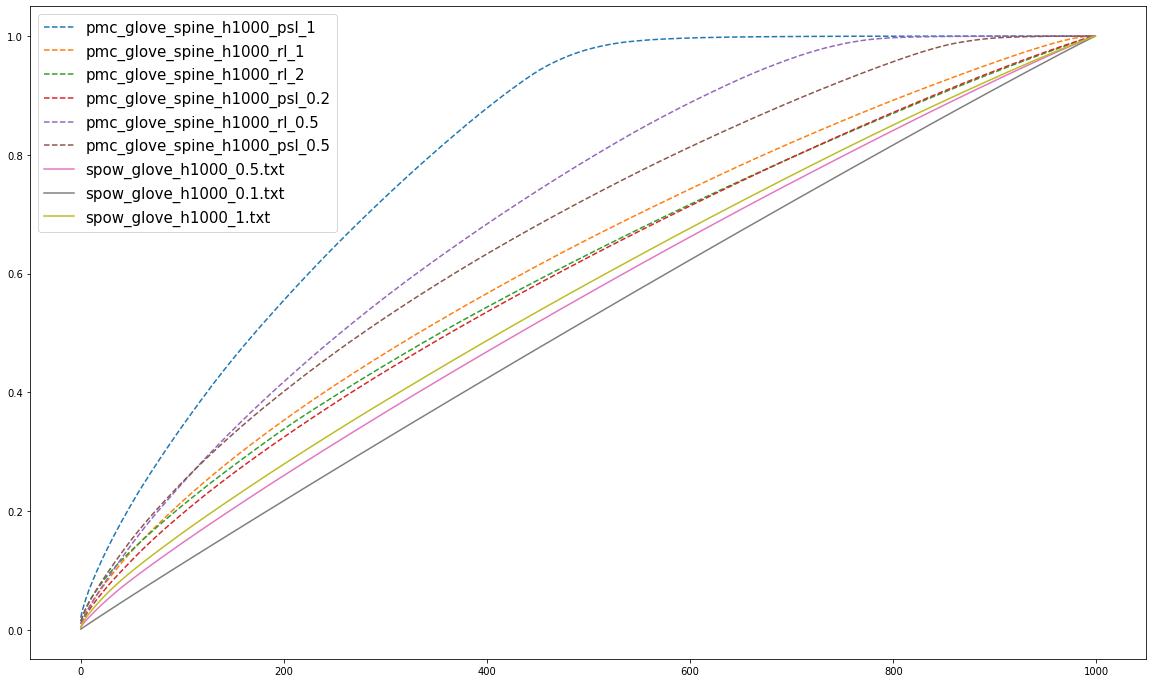

In [11]:
plt.figure(figsize=(20,12))

for i in all_rep_glove_spine.keys():
    temp = (normalize(all_rep_glove_spine[i])**2).sum(axis = 0)
    plt.plot(np.cumsum(temp[temp.argsort()[::-1]]/20000), label = i, linestyle='dashed')
for i in all_rep_glove_spow.keys():
    temp = (normalize(all_rep_glove_spow[i])**2).sum(axis = 0)
    plt.plot(np.cumsum(temp[temp.argsort()[::-1]]/20000), label = i)
plt.legend(fontsize=15)


In [12]:
for i in vocab:
    print(i)
    print(    topkwords(word_embedding= all_rep_glove_spine['pmc_glove_spine_h1000_rl_2'], word=i))
    print()
    

illness
['reinfection', 'infection', 'causative', 'pathogens', 'infectious', 'borne', 'etiologic', 'influenza', 'serological', 'hev']

diabetes
['dm', 'atorvastatin', 'hypercholesterolemia', 'ldl', 'prediabetes', 'dyslipidemia', 'lowering', 'ckd', 'albuminuria', 'diabetes']

indomethacin
['pretreatment', 'lps', 'inhibited', 'prevented', 'abolished', 'attenuates', 'abrogated', 'attenuated', 'blocked', 'dependently']

alzheimer
['neuropathology', 'neuroinflammation', 'prion', 'amyloid', 'syn', 'neurodegeneration', 'synuclein', 'alzheimer', 'lrrk', 'aβ']

insulin
['insulin', 'rosiglitazone', 'hyperinsulinemia', 'igf', 'pioglitazone', 'hyperglycemia', 'lipogenesis', 'sur', 'islets', 'pcos']

genetics
['genotypic', 'heritability', 'segregating', 'trait', 'loci', 'markers', 'polymorphic', 'microsatellites', 'qtl', 'genic']

depression
['personality', 'psychopathology', 'depressive', 'mdd', 'ptsd', 'mood', 'psychiatric', 'internalizing', 'psychotic', 'depression']

melanoma
['hnscc', 'gliobla

In [12]:
original_sg = KeyedVectors.load_word2vec_format('../GloVe/GloVe_pmc_300_min20_win16_20k.txt' , binary=False)

In [13]:
all_sg_spine = os.listdir('../gridserach_SG/result_vector/')
all_sg_spow = os.listdir('../gridserach_SG/spow_result_vectors/')


In [14]:
all_rep_sg_spine = {}
for i in all_sg_spine:
    all_rep_sg_spine[i] = KeyedVectors.load_word2vec_format('../gridserach_SG/result_vector/' + i , binary=False)

all_rep_sg_spow = {}
for i in all_sg_spow:
    all_rep_sg_spow[i] = KeyedVectors.load_word2vec_format('../gridserach_SG/spow_result_vectors/' + i , binary=False)

In [15]:
res_sg = {}
for i in all_rep_sg_spine.keys():
    score = 0
    for j in range(1,3):
        for word in vocab:
            words = topkwords(all_rep_sg_spine[i], word, rank=j)
            mat = original_sg[words]
            vector_norm = norm(mat, ord=2, axis=1)
            normalized_mat = mat / vector_norm.reshape(10,1)
            score += np.matmul(normalized_mat, normalized_mat.T).sum()
    res_sg[i] = score

In [16]:
for i in all_rep_sg_spow.keys():
    score = 0
    for j in range(1,3):
        for word in vocab:
            words = topkwords(all_rep_sg_spow[i], word, rank=j)
            mat = original_sg[words]
            vector_norm = norm(mat, ord=2, axis=1)
            normalized_mat = mat / vector_norm.reshape(10,1)
            score += np.matmul(normalized_mat, normalized_mat.T).sum()
    res_sg[i] = score

In [17]:
sparsity_sg = {}

for i in all_rep_sg_spine.keys():
    sparsity_sg[i] = sparsity_ratio(all_rep_sg_spine[i])
    
for i in all_rep_sg_spow.keys():
    sparsity_sg[i] = sparsity_ratio(all_rep_sg_spow[i])
    

In [18]:
pd.DataFrame(res_sg.items(), columns=['name', 'score']).merge(pd.DataFrame(sparsity_sg.items(), columns=['name', 'sparsity']), on = 'name').sort_values('score', ascending=False)

,name,score,sparsity
0,pmc_sg_spine_h1000_rl_1,1164.434692,0.893111
3,pmc_sg_spine_h1000_psl_0.2,1111.807579,0.858257
1,pmc_sg_spine_h1000_rl_2,1096.501266,0.838482
2,pmc_sg_spine_h1000_psl_0.5,1079.188366,0.941443
4,spow_sg_h1000_1.txt,736.376226,0.783898
5,spow_sg_h1000_0.5.txt,720.100153,0.726461
6,spow_sg_h1000_0.1.txt,718.665350,0.408768


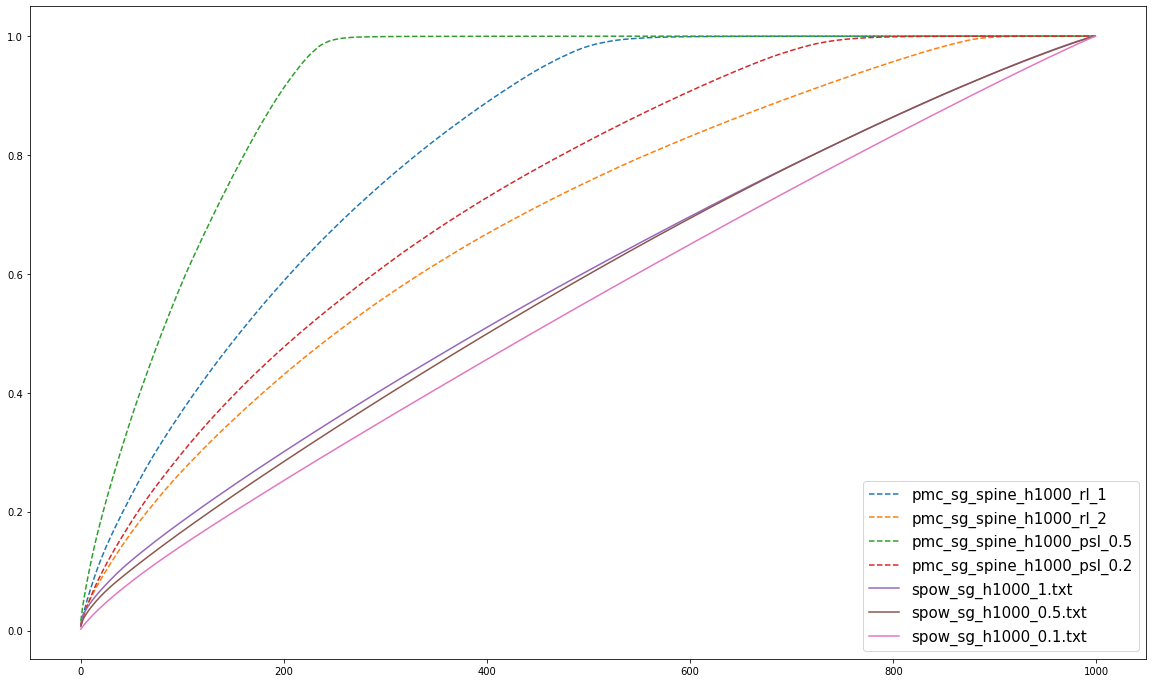

In [19]:
plt.figure(figsize=(20,12))

for i in all_rep_sg_spine.keys():
    temp = (normalize(all_rep_sg_spine[i])**2).sum(axis = 0)
    plt.plot(np.cumsum(temp[temp.argsort()[::-1]]/20000), label = i, linestyle='dashed')
for i in all_rep_sg_spow.keys():
    temp = (normalize(all_rep_sg_spow[i])**2).sum(axis = 0)
    plt.plot(np.cumsum(temp[temp.argsort()[::-1]]/20000), label = i)
plt.legend(fontsize=15)


In [20]:
word_emb = {'pmc_glove_spine_h1000_rl_2': all_rep_glove_spine['pmc_glove_spine_h1000_rl_2'],
            'spow_glove_h1000_1.txt': all_rep_glove_spow['spow_glove_h1000_1.txt'],
            'pmc_sg_spine_h1000_rl_0.2': all_rep_sg_spine['pmc_sg_spine_h1000_psl_0.2'], 
            'spow_sg_h1000_1.txt': all_rep_sg_spow['spow_sg_h1000_1.txt'],
            'sg_original': original_sg,
            'glove_original': original}
                                                        
                                            

In [21]:
from IPython.display import display, HTML


In [23]:
dim_word = []

for j in word_emb.keys():
    dim_word.append(topkwords(word_embedding = word_emb[j], word= 'cell', k= 10))
display(pd.DataFrame(dim_word, index= word_emb.keys()))


,0,1,2,3,4,5,6,7,8,9
pmc_glove_spine_h1000_rl_2,whereas,additionally,addition,also,specifically,while,although,both,therefore,moreover
spow_glove_h1000_1.txt,daughter,derivatives,rely,tetrazolium,pumps,skp,relied,based,ruthenium,consumer
pmc_sg_spine_h1000_rl_0.2,assays,cytometry,pbmc,cell,assay,cells,cocultured,mrna,timepoint,transfection
spow_sg_h1000_1.txt,receives,send,body,serotonin,shapiro,basal,calcium,gaa,whitney,mann
sg_original,vhl,cdh,jak,chromosomal,nonsense,aberrations,brca,apc,pik,hoxb
glove_original,crb,lithium,amiodarone,gnrh,disagreement,stain,staining,win,olive,coffee


In [24]:
dim_word = []

for j in word_emb.keys():
    dim_word.append(topkwords(word_embedding = word_emb[j], word= 'protease', k= 10))
display(pd.DataFrame(dim_word, index= word_emb.keys()))


,0,1,2,3,4,5,6,7,8,9
pmc_glove_spine_h1000_rl_2,enzyme,protease,peptidase,enzymes,proteases,enzymatic,proteinase,tris–hcl,dtt,cellulase
spow_glove_h1000_1.txt,clots,proteinase,purifying,protease,favouring,denser,favoring,expense,μv,lipolysis
pmc_sg_spine_h1000_rl_0.2,cocktail,supplemented,bovine,hbss,fcs,calf,louis,edta,sigma,aldrich
spow_sg_h1000_1.txt,artesunate,rhythmic,ims,substrates,dictate,depend,physicochemical,confer,modulations,bbr
sg_original,import,sewage,evasion,lettuce,indirectly,krebs,wastewater,cystine,supply,govern
glove_original,mvs,cl,prof,ocean,kc,panx,discard,angptl,gone,northwestern


In [25]:
dim_word = []

for j in word_emb.keys():
    dim_word.append(topkwords(word_embedding = word_emb[j], word= 'hiv', k= 10))
display(pd.DataFrame(dim_word, index= word_emb.keys()))


,0,1,2,3,4,5,6,7,8,9
pmc_glove_spine_h1000_rl_2,hiv,viral,hsv,env,retrovirus,hcmv,nef,hcv,virion,virions
spow_glove_h1000_1.txt,acquiring,retrieving,retrovirus,manipulating,adopting,circumcision,virions,preincubation,htlv,incubating
pmc_sg_spine_h1000_rl_0.2,tb,mtb,vl,tuberculosis,mycobacteria,leprosy,ltbi,cryptococcal,mycobacterial,granulomas
spow_sg_h1000_1.txt,sglt,quantification,diluted,unbiased,dilution,quantitation,genotyping,determinations,cvs,aromatase
sg_original,srh,flex,rls,lms,igan,counterstained,hcv,phs,tetherin,persistently
glove_original,influential,naloxone,vaccine,cen,pag,drug,vaccines,drugs,inhibitors,morphine


In [106]:
dim_word = []

for j in word_emb.keys():
    dim_word.append(topkwords(word_embedding = word_emb[j], word= 'jurassic', k= 10))
display(pd.DataFrame(dim_word, index= word_emb.keys()))


KeyError: "word 'jurassic' not in vocabulary"

In [30]:
vocab = ['endemic', 'pandemic' , 'influenza', 'ards', 'rds', 'corona', 'coronavirus']

In [31]:
for i in vocab: 
    print(i)
    dim_word = []
    for j in word_emb.keys():
        dim_word.append(topkwords(word_embedding = word_emb[j], word= i, k= 6, rank=1))
    display(pd.DataFrame(dim_word, index= word_emb.keys()))
    print('-------------------------------------------------------------')

endemic


,0,1,2,3,4,5
pmc_glove_spine_h1000_rl_2,reinfection,infection,causative,pathogens,infectious,borne
spow_glove_h1000_1.txt,cholera,centuries,drastic,inland,inhabit,greatest
pmc_sg_spine_h1000_rl_0.2,political,officials,programmes,economic,authorities,public
spow_sg_h1000_1.txt,knee,inclination,flexion,kinematics,endemic,quadriceps
sg_original,southeastern,mountain,paulo,quaternary,northeastern,southwestern
glove_original,domains,subdomains,saharan,subdomain,villages,domain


-------------------------------------------------------------
pandemic


,0,1,2,3,4,5
pmc_glove_spine_h1000_rl_2,epidemics,outbreaks,dengue,pandemic,seasonality,communicable
spow_glove_h1000_1.txt,handful,exclusively,instances,exclusive,lactam,actually
pmc_sg_spine_h1000_rl_0.2,ns,replication,adv,viral,vv,vp
spow_sg_h1000_1.txt,epidemics,epidemic,senegal,eda,americas,seasons
sg_original,hoffmann,subsp,rapa,killed,ssp,synechocystis
glove_original,pathogenesis,drop,degeneration,tunneling,friction,flare


-------------------------------------------------------------
influenza


,0,1,2,3,4,5
pmc_glove_spine_h1000_rl_2,reinfection,infection,causative,pathogens,infectious,borne
spow_glove_h1000_1.txt,leu,bxpc,hong,clade,atlas,bird
pmc_sg_spine_h1000_rl_0.2,ns,replication,adv,viral,vv,vp
spow_sg_h1000_1.txt,interferon,virological,isg,antiviral,virologic,oas
sg_original,vhl,cdh,jak,chromosomal,nonsense,aberrations
glove_original,lme,spore,asexual,imd,chitinase,pathogen


-------------------------------------------------------------
ards


,0,1,2,3,4,5
pmc_glove_spine_h1000_rl_2,lung,airways,copd,smoke,airflow,pulmonary
spow_glove_h1000_1.txt,preclinical,esrd,underway,reached,already,failed
pmc_sg_spine_h1000_rl_0.2,sequelae,fulminant,complications,complication,necrotizing,subacute
spow_sg_h1000_1.txt,luts,exacerbations,newborns,airways,alt,rbv
sg_original,shocks,reefs,stemi,reef,dhf,predator
glove_original,sepharose,adcc,glc,adi,bxpc,elution


-------------------------------------------------------------
rds


,0,1,2,3,4,5
pmc_glove_spine_h1000_rl_2,preterm,rds,perinatal,infant,lbw,neonatal
spow_glove_h1000_1.txt,drivers,rds,past,amongst,risky,hindered
pmc_sg_spine_h1000_rl_0.2,rgcs,retinal,cones,optic,retina,retinas
spow_sg_h1000_1.txt,ozone,inhalation,surfactant,ipa,subsystems,laden
sg_original,spg,hypotonic,alba,panc,sorbitol,homeobox
glove_original,aag,opc,cct,ttt,reacts,anticipate


-------------------------------------------------------------
corona


,0,1,2,3,4,5
pmc_glove_spine_h1000_rl_2,brain,masks,matter,hemispheres,rois,regions
spow_glove_h1000_1.txt,patel,modestly,corpus,unusually,lec,gestures
pmc_sg_spine_h1000_rl_0.2,oval,rounded,elongated,thickened,lining,protruding
spow_sg_h1000_1.txt,superficial,enter,bloodstream,vapour,vapor,urinary
sg_original,winning,fat,pie,adoptive,bai,manassas
glove_original,corona,buffering,merged,filtered,interprofessional,mission


-------------------------------------------------------------
coronavirus


,0,1,2,3,4,5
pmc_glove_spine_h1000_rl_2,reinfection,infection,causative,pathogens,infectious,borne
spow_glove_h1000_1.txt,e–,b–c,–s,movie,faces,fps
pmc_sg_spine_h1000_rl_0.2,ns,replication,adv,viral,vv,vp
spow_sg_h1000_1.txt,wnv,hev,pedv,zoonotic,ebov,coronavirus
sg_original,rsv,clb,conformed,simvastatin,dalian,cmv
glove_original,ura,emr,nets,silent,ste,likelihood


-------------------------------------------------------------


In [22]:

def plot_heatmap(word_embedding, dim=900, word='', w_sort = []):
    #fig.suptitle(word+' sorted by '+' '.join(w_sort), fontsize=70)
#     plt.subplots_adjust(left=0, right=1, top=0.86, bottom=0.23)
    x1 = sorted_by(word_embedding, word, w_sort)
    sns.heatmap(x1.reshape((dim,1)).T, cmap='RdBu_r', center=0, xticklabels=0, cbar=False, yticklabels=False)
    

In [23]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec



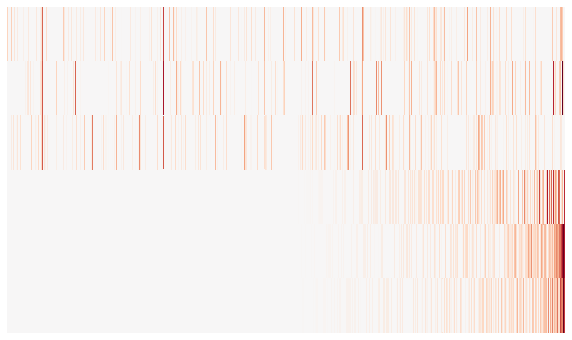

In [28]:
fig = plt.figure(figsize=(10,6))
gs1 = gridspec.GridSpec(6, 1)
gs1.update(wspace=0.025, hspace=0.0)

cancer = ['melanoma','colorectal','ewing']
for j,i in enumerate(cancer):
    ax1 = plt.subplot(gs1[j])
    plot_heatmap(all_rep_glove_spine['pmc_glove_spine_h1000_rl_2'], dim=1000, word=i, w_sort=drug)

drug = ['acetaminophen', 'aspirin', 'clopidogrel']
for j,i in enumerate(drug):
    ax1 = plt.subplot(gs1[j+3])

    plot_heatmap(all_rep_glove_spine['pmc_glove_spine_h1000_rl_2'], dim=1000, word=i, w_sort=drug)

plt.savefig('./drugsort_spine.eps', format='eps')


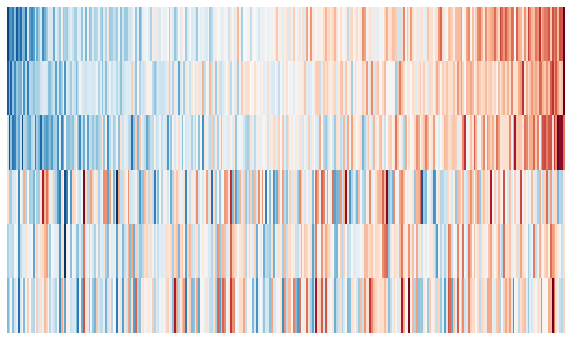

In [90]:
fig = plt.figure(figsize=(10,6))
gs1 = gridspec.GridSpec(6, 1)
gs1.update(wspace=0.025, hspace=0.0)

cancer = ['melanoma','colorectal','ewing']
for j,i in enumerate(cancer):
    ax1 = plt.subplot(gs1[j])
    plot_heatmap(original, dim=300, word=i, w_sort=cancer)

drug = ['acetaminophen', 'aspirin', 'clopidogrel']
for j,i in enumerate(drug):
    ax1 = plt.subplot(gs1[j+3])
    plot_heatmap(original, dim=300, word=i, w_sort=cancer)
plt.savefig('./glove.png')


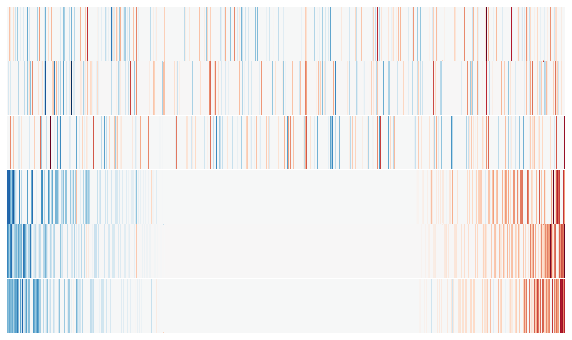

In [29]:
fig = plt.figure(figsize=(10,6), edgecolor='b', )
gs1 = gridspec.GridSpec(6, 1)
gs1.update(wspace=0.025, hspace=0.01)

cancer = ['melanoma','colorectal','ewing']
for j,i in enumerate(cancer):
    ax1 = plt.subplot(gs1[j])
    plot_heatmap(all_rep_glove_spow['spow_glove_h1000_1.txt'], dim=1000, word=i, w_sort=drug)

drug = ['acetaminophen', 'aspirin', 'clopidogrel']
for j,i in enumerate(drug):
    ax1 = plt.subplot(gs1[j+3])

    plot_heatmap(all_rep_glove_spow['spow_glove_h1000_1.txt'], dim=1000, word=i, w_sort=drug)
plt.savefig('./drogsort_spow.eps', format='eps')


In [116]:
for j in word_emb.keys():
    print(j)
    display(Interpretability_dim(word_emb[j]))


pmc_glove_spine_h1000_rl_2


,0,1,2,3,4,5,6,7,8,9
0,whereas,additionally,addition,also,specifically,while,although,both,therefore,moreover
1,seemed,continue,didn,conceivably,appear,hypothesize,make,utilize,imply,take
2,dealt,initially,conventionally,already,differently,seldom,secondarily,repeatedly,interpreted,accommodated
3,which,also,addition,other,well,although,only,over,but,shown
4,perspectives,experiences,perceptions,interventions,initiatives,interdisciplinary,empowerment,engagement,holistic,addressing
5,unpublished,coworkers,zhu,colleagues,kim,huang,liao,xu,yan,tan
6,knockdown,overexpression,transfected,abolished,interacted,overexpressing,downregulation,knocked,erk,conversely
7,previously,collaborators,coworkers,argued,patel,described,proposed,williams,schmidt,zhu
8,denotes,assumed,instantaneous,imaginary,equation,corresponds,zero,scalar,dimensionless,nonlinearity
9,observing,without,analysing,exploring,recovering,emphasizing,succeeded,looking,validating,characterizing


spow_glove_h1000_1.txt


,0,1,2,3,4,5,6,7,8,9
0,pgf,repertoires,ompa,symmetrically,nielsen,ramus,monocytic,leydig,teleost,entre
1,enables,bring,combine,mentioned,blockage,allowing,ensures,allows,return,enabling
2,irrespective,particular,debatable,possibly,certainly,probably,perhaps,recognized,place,regardless
3,diodes,calcd,multinucleated,dysplastic,leds,pecam,lvh,hematoxylin,hus,cdcl
4,respect,relate,works,analogous,necessarily,correspond,behave,relation,exceptions,relating
5,cnr,infra,vimentin,disappearance,downregulates,glycosylated,δf,bifurcation,startle,lmp
6,emphasize,collaboration,review,emphasized,cooperative,contributions,accompany,influences,cs,collaborative
7,hog,–s,figs,ddi,lanes,inlet,flank,query,clicking,flushing
8,meis,tec,atl,tam,sows,brd,dma,trs,srsf,tenofovir
9,cages,shaken,landing,collect,cocultured,gather,plated,mesothelial,dir,pss


pmc_sg_spine_h1000_rl_0.2


,0,1,2,3,4,5,6,7,8,9
0,but,not,without,our,might,these,would,there,the,furthermore
1,colleagues,al,fernandez,ben,tanaka,rodriguez,wong,andersen,davies,nguyen
2,speculation,corroborate,argue,argument,lend,suggestion,emphasize,substantiate,premise,facts
3,prevented,altering,counteracted,interfere,prevent,preventing,downregulating,prevents,diminish,deplete
4,spite,loses,underscoring,highlighting,corroborating,establishes,noteworthy,owing,exhibits,keeps
5,metric,arbitrary,parameterized,analytically,mathematically,scaled,mathematical,weighting,dependencies,implements
6,interestingly,significantly,indicating,suggesting,remarkably,neither,surprising,pronounced,considerably,indicated
7,political,officials,programmes,economic,authorities,public,investments,nationwide,markets,rural
8,classically,traditionally,williams,gordon,originally,mitchell,shaw,weber,gardner,walsh
9,suitable,quick,easier,desirable,amenable,convenient,preferable,challenging,straightforward,practical


spow_sg_h1000_1.txt


,0,1,2,3,4,5,6,7,8,9
0,looks,classify,physics,isothermal,interspersed,powdered,dendrogram,fractal,determinations,classifies
1,while,notably,correspondingly,remarkably,similarly,consistently,contrary,comparatively,accordingly,meanwhile
2,secondly,practical,anecdotal,advocates,rigorous,guarantee,implementation,building,fortunately,on
3,overwhelming,thought,ischaemic,defensive,certificate,questioned,suffer,immunosuppression,difficulty,predisposed
4,deplete,plr,cos,potentiate,gw,preferential,disrupted,sequential,synergism,etoh
5,be,envisaged,happen,entail,studying,avoided,investigation,this,think,studies
6,clarified,contrasting,tspo,allopurinol,lateralization,pots,hsd,clozapine,garden,ohda
7,intriguing,implicating,presumably,originating,excludes,exhibiting,predominantly,absent,unidentified,dominantly
8,derive,utilising,signatures,combinations,sequential,attributes,employing,choices,steps,intervals
9,interpret,resolve,emerge,discover,discern,infer,diminish,discriminate,intervene,anticipate


sg_original


,0,1,2,3,4,5,6,7,8,9
0,jcb,sadabs,intussusception,prisma,alexithymia,disclosures,consort,scoping,gatk,pronotum
1,hepes,tris–hcl,wako,mercaptoethanol,streptavidin,pegfp,transwell,skbr,calbiochem,rpmi
2,pdk,downregulates,adj,mkp,cort,dusp,homa,upregulates,dhea,hscrp
3,phosphatidylinositol,phosphoinositide,mitogen,immunoregulatory,endothelium,nfkb,ceramide,phosphatases,nkt,myofibroblast
4,implicating,renin,precursors,pupillary,cytosolic,naa,sra,immunoblot,purifying,polyamines
5,aboriginal,advocacy,anaemia,advocates,nutrition,carers,wellbeing,refugee,literacy,deficiencies
6,pyramidal,premotor,neocortical,eigenvalues,cerebellar,spared,purkinje,interneurons,sz,interneuron
7,hull,fps,rgb,pdb,fuzzy,descriptor,kalman,decoy,dir,overlay
8,import,sewage,evasion,lettuce,indirectly,krebs,wastewater,cystine,supply,govern
9,housekeeping,tumorigenesis,fbxw,chemopreventive,conditionally,hcc,indispensable,fulfill,steatohepatitis,biotechnological


glove_original


,0,1,2,3,4,5,6,7,8,9
0,ea,lgg,validated,fraction,hipsc,profiles,simplex,multiplex,sanger,hcm
1,mvs,cl,prof,ocean,kc,panx,discard,angptl,gone,northwestern
2,subtilis,transposon,transposase,fluorescens,oryzae,solani,synechocystis,flp,phages,syringae
3,dosing,administrations,dosed,children,practice,prospectively,nurse,daily,pediatrics,paediatric
4,eugenol,ethyl,saturated,ginger,pheromone,arp,sticky,garlic,hexane,once
5,csi,mva,azimuth,pixels,harmonics,mf,smoother,lidocaine,reflectivity,optics
6,save,tehran,savings,incurred,repairs,bes,unintentional,implementing,bed,saving
7,oncogenes,upa,cdx,ceacam,trophoblast,oncogenic,tki,egfr,tgfb,kras
8,neurotrophic,believed,initially,stabilization,molecular,earliest,pathogenesis,stabilize,subsequent,later
9,ascending,failures,descending,symptoms,coma,volumes,quarter,consisted,congestive,tenth


In [53]:
pd.DataFrame(original.vocab.keys()).to_csv('./vocabs.csv', index=False)